In [5]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,784).astype('float32') / 255.0
x_test = x_test.reshape(10000,784).astype('float32') / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

x_val = x_train[:42000]
x_train = x_train[42000:]
y_val = y_train[:42000]
y_train = y_train[42000:]

model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

loss_and_metrics=model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : '+str(loss_and_metrics))

xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]]))+', Predict : ' +str(yhat[i]))

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 3s 155us/step - loss: 1.1465 - acc: 0.7205 - val_loss: 0.6462 - val_acc: 0.8404
Epoch 2/5
18000/18000 [==============================] - 2s 132us/step - loss: 0.5083 - acc: 0.8719 - val_loss: 0.4747 - val_acc: 0.8733
Epoch 3/5
18000/18000 [==============================] - 3s 144us/step - loss: 0.4090 - acc: 0.8889 - val_loss: 0.4137 - val_acc: 0.8859
Epoch 4/5
18000/18000 [==============================] - 2s 137us/step - loss: 0.3649 - acc: 0.8984 - val_loss: 0.3808 - val_acc: 0.8943
Epoch 5/5
10000/10000 [==============================] - 0s 43us/step

loss_and_metrics : [0.33201685317754748, 0.90490000000000004]
True : 2, Predict : 2
True : 0, Predict : 0
True : 5, Predict : 5
True : 3, Predict : 3
True : 9, Predict : 9


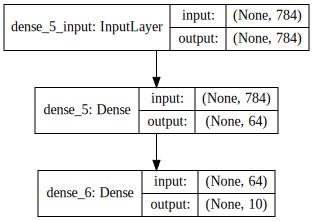

In [11]:
#학습 모델 저장
from keras.models import load_model
model.save('mnist_mlp_model.h5')

#모델 아키텍쳐 확인
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
import numpy as np

dataset = np.loadtxt("./4FileIOTest.data", delimiter=",")
print(dataset)

[ 1.  4.  2.  5.  1.  2.  5.  2.]
